# Задание 1

In [12]:
import numpy as np

In [61]:
X = np.array([
[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
[-0.18757272, 1.30337355, 5.12093014, 3.46363202],
[-0.81094525, 1.82463398, 5.79686488, 1.86159445],
[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
[-0.62972637, 0.77750764, 2.84124027, 4.54410559],
[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]])

In [14]:
y = np.array([ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218])

##### для выявления максимальной зависимоти посчитаем корреляцию каждого признака

In [26]:
np.corrcoef(X[:, 0], y)[0, 1], np.corrcoef(X[:, 1], y)[0, 1], np.corrcoef(X[:, 2], y)[0, 1], np.corrcoef(X[:, 3], y)[0, 1], 

(0.35167668869664337,
 0.3998583479845227,
 0.5826374546323106,
 0.6029167757328506)

##### максимальную корреляцию с целевой переменной имеют 3 и 4 признаки

In [62]:
ones = np.ones((X.shape[0], 1))
X = np.hstack((X[:, 2].reshape(-1, 1), X[:, 3].reshape(-1, 1)))
X = np.hstack((ones, X))
X

array([[1.        , 3.03636353, 2.69287214],
       [1.        , 5.12093014, 3.46363202],
       [1.        , 5.79686488, 1.86159445],
       [1.        , 3.65529809, 1.66746094],
       [1.        , 2.50594319, 1.69755173],
       [1.        , 2.84124027, 4.54410559],
       [1.        , 1.95026215, 1.51874636],
       [1.        , 7.47708735, 2.61081203],
       [1.        , 3.61420599, 5.10773362],
       [1.        , 1.65752765, 1.59635987]])

In [64]:
XTX = X.T.dot(X)
np.linalg.det(XTX)

4547.328074863329

##### Определитель не близок к нулю

In [66]:
XTX_inv = np.linalg.inv(XTX)
b = XTX_inv.dot(X.T).dot(y)
b

array([3.64001086, 0.70753914, 1.04851745])

##### модель регрессии имеет вид: y = 3.64001086 + 3.64001086*x3 + 1.04851745*x4

In [69]:
z = X.dot(b)
e = y - z
e.mean()

1.9539925233402757e-15

##### средняя ошибка фактически равна нулю

##### вычислим коэффиуиент детерминации

In [71]:
def sum_of_squares(samples):
    return ((samples - samples.mean()) ** 2).sum()

In [74]:
R = 1 - sum_of_squares(e) / sum_of_squares(y)
R

0.6224419876505319

##### проверим значимость уравнений регрессии

In [75]:
n = X.shape[0]
m = 2

k1 = m
k2 = n - m - 1

k1, k2

(2, 7)

In [77]:
from scipy import stats
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

4.73741412777588

In [80]:
F = (R / k1) / ((1 - R) / k2)
F

5.770098595498476

##### Статистика попала в критическую область, значит мы отвергаем гипотезу о том, что между данными нет связи. Таким образом, наша модель регрисси оказалась значимой

# Задание 2

##### имеем 2 выборки

In [99]:
y1 = np.array([1 if i < 77 else 0 for i in range(2509)])
y2 = np.array([1 if i < 60 else 0 for i in range(1465)])

y1_mean, y2_mean = y1.mean(), y2.mean()

In [100]:
y = np.concatenate([y1, y2])

In [101]:
y_mean = y.mean()
y_mean

0.03447408152994464

In [102]:
n1, n2 = y1.shape[0], y2.shape[0]

SS_b = n1 * (y1_mean - y_mean) ** 2 + n2 * (y2_mean - y_mean) ** 2

SS_w = ((y1 - y1_mean) ** 2).sum() + ((y2 - y2_mean) ** 2).sum() 

SS_b, SS_w

(0.09748158004016791, 132.17956925035745)

In [104]:
k = 2
n = n1 + n2

k1 = k - 1
k2 = n - k

sigma2_b = SS_b / k1
sigma2_w = SS_w / k2

sigma2_b, sigma2_w

(0.09748158004016791, 0.03327783717279895)

In [106]:
F = sigma2_b / sigma2_w
F

2.9293243889013496

In [108]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

3.8438010503414866

##### Статистика не попала в критическую область, значит различие в конверсиях не является статистически значимым

# Задание 3

In [109]:
x1 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
x2 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74])
x3 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89])

In [111]:
y1.mean(), y1.std(ddof=1)

(7.500909090909093, 2.031568135925815)

In [116]:
y2.mean(), y2.std(ddof=1)

(7.50090909090909, 2.0316567355016177)

In [119]:
y3.mean(), y3.std(ddof=1)

(7.5, 2.030423601123667)

In [120]:
y4.mean(), y4.std(ddof=1)

(7.500909090909091, 2.0305785113876023)

In [125]:
np.corrcoef(x1, y1)[0, 1], np.corrcoef(x2, y2)[0, 1], np.corrcoef(x3, y3)[0, 1], np.corrcoef(x4, y4)[0, 1]

(0.81642051634484, 0.8162365060002427, 0.8162867394895982, 0.8165214368885028)

In [126]:
def calc_lin_regr_coefs(x, y):
    b1 = np.cov(x, y, ddof=1)[0, 1] / np.var(x1, ddof=1)
    b0 = y.mean() - b1 * x.mean()
    return b0, b1

In [129]:
calc_lin_regr_coefs(x1, y1), calc_lin_regr_coefs(x2, y2), calc_lin_regr_coefs(x3, y3), calc_lin_regr_coefs(x4, y4)

((3.0000909090909094, 0.5000909090909093),
 (3.00090909090909, 0.5),
 (3.0024545454545457, 0.49972727272727274),
 (3.0017272727272735, 0.49990909090909086))

In [130]:
from matplotlib import pyplot as plt
plt.style.use("seaborn-whitegrid")

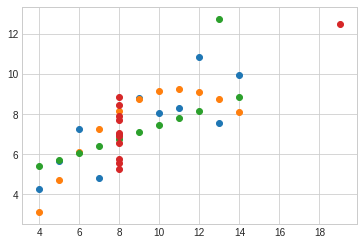

In [133]:
plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.scatter(x3, y3)
plt.scatter(x4, y4)